In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
files.upload()

Saving Keyword_data - Keyword_data.csv to Keyword_data - Keyword_data.csv


{'Keyword_data - Keyword_data.csv': b'Title,Keyword 1,Keyword 2,Keyword 3,Keyword 4,Keyword 5,Keyword 6,Keyword 7,Keyword 8,Keyword 9,Keyword 10,Keyword 11,Keyword 12\r\nFeb/03,,,,,,,,,,,,\r\n,,,,,,,,,,,,\r\nMeta-Analyses of Financial Performance and Equity: Fusion or Confusion?,EQUITY,ORGANIZATIONAL sociology,PERFORMANCE,META-analysis,PSYCHOMETRICS,ORGANIZATIONAL research,FINANCIAL performance,AGENCY theory,ORGANIZATIONAL effectiveness,ORGANIZATIONAL behavior,CORPORATE governance,\r\n"Home Country Environments, Corporate Diversification Strategies, and Firm Performance",DIVERSIFICATION in industry,BUSINESS planning,PERFORMANCE standards,EMPLOYEES -- Rating of,CORPORATE culture,STRATEGIC planning,ORGANIZATIONAL effectiveness,MANAGEMENT science,MANAGEMENT research,PRODUCT management,,\r\nSafeguarding Investments in Asymmetric Interorganizational Relationships: Theory and Evidence,INTERORGANIZATIONAL relations,INTERGROUP relations,BUSINESS communication,INVESTMENTS,SUPPLY chains,KNOWLEDG

# **Task 1**

# **1. Download the dataset**


(https://docs.google.com/spreadsheets/d/1GTwv07i98vL7S-J9eeP8NV1fJVnymm1eJ31RDyt4Mxw/edit?usp=sharing) 

In [3]:
df = pd.read_csv('/content/Keyword_data - Keyword_data.csv')

# **2. Write a Python code to extract keyword data from the above file and convert it to a weighted adjacency matrix.**

In [4]:
df.dropna(axis=0, how = 'all', inplace = True, thresh =2)
df

,Title,Keyword 1,Keyword 2,Keyword 3,Keyword 4,Keyword 5,Keyword 6,Keyword 7,Keyword 8,Keyword 9,Keyword 10,Keyword 11,Keyword 12
2,Meta-Analyses of Financial Performance and Equ...,EQUITY,ORGANIZATIONAL sociology,PERFORMANCE,META-analysis,PSYCHOMETRICS,ORGANIZATIONAL research,FINANCIAL performance,AGENCY theory,ORGANIZATIONAL effectiveness,ORGANIZATIONAL behavior,CORPORATE governance,NaN
3,"Home Country Environments, Corporate Diversifi...",DIVERSIFICATION in industry,BUSINESS planning,PERFORMANCE standards,EMPLOYEES -- Rating of,CORPORATE culture,STRATEGIC planning,ORGANIZATIONAL effectiveness,MANAGEMENT science,MANAGEMENT research,PRODUCT management,NaN,NaN
4,Safeguarding Investments in Asymmetric Interor...,INTERORGANIZATIONAL relations,INTERGROUP relations,BUSINESS communication,INVESTMENTS,SUPPLY chains,KNOWLEDGE management,INTERORGANIZATIONAL networks,CORPORATE governance,GROUP decision making,INTELLECTUAL capital,NaN,NaN
5,Managerialist and Human Capital Explanations f...,EXECUTIVE compensation,WAGES,HUMAN capital,LABOR economics,PERSONNEL management,MANAGEMENT science,CONTINGENCY theory (Management),COMPENSATION management,EXECUTIVE ability (Management),CORPORATE governance,NaN,NaN
6,Bidding Wars Over R&D-Intensive Firms: Knowled...,KNOWLEDGE management,INFORMATION resources management,MANAGEMENT information systems,BREAK-even analysis,DATA mining,MANAGEMENT science,RESEARCH & development,RESEARCH & development contracts,CORPORATE governance,DECISION making,ORGANIZATIONAL behavior,TRANSACTION costs
7,When “The Show Must Go On”: Surface Acting and...,EMOTIONS (Psychology),INTERPERSONAL relations,STRESS (Psychology),SOCIAL interaction,SOCIAL psychology,EMPLOYEES -- Attitudes,CUSTOMER services,CUSTOMER satisfaction,JOB stress,PEER review (Professional performance),NaN,NaN
8,Relationships among Supervisors' and Subordina...,SUPERVISORS,JUSTICE,CONFLICT management,MEDIATION,EMPLOYEES,INDUSTRIAL relations,ORGANIZATIONAL behavior,UNITED States -- National Guard,ORGANIZATIONAL effectiveness,DECISION making,RESOURCE allocation,NaN
9,Punctuated Equilibrium and Linear Progression:...,INDUSTRIAL relations,MANAGEMENT science,DECISION theory,ORGANIZATIONAL sociology,PUNCTUATED equilibrium (Evolution),ORGANIZATIONAL change,ORGANIZATIONAL behavior,ORGANIZATIONAL structure,BUSINESS models,ORGANIZATIONAL research,NaN,NaN
13,The Relationship between Overconfidence and th...,DECISION making,EXECUTIVES,INDUSTRIAL management,NEW products,HIGH technology industries,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,Governance Through Ownership: Centuries of Pra...,CORPORATE governance,INDUSTRIAL management,STOCKHOLDERS wealth,INSTITUTIONAL investors,WAGES,NEW products,ORGANIZATIONAL structure,ORGANIZATIONAL behavior,DECENTRALIZATION in management,ORGANIZATIONAL effectiveness,NaN,NaN


#### Lookup dictionary for assigning weights in metrics

In [5]:
lookupDictionary = df.set_index('Title').T.to_dict('list')

In [6]:
lookupDictionary

{'A Behavioral Theory of R&D Expenditures and Innovations: Evidence from Shipbuilding': ['ORGANIZATIONAL behavior',
  'CORPORATIONS -- Finance',
  'RESEARCH & development',
  'INDUSTRIAL management',
  'INNOVATIONS in business',
  'INNOVATION management',
  'BUSINESS planning',
  'SHIPBUILDING industry',
  'TECHNOLOGICAL innovations -- Economic aspects',
  'SUCCESS in business',
  'COMPETITIVE advantage',
  'ORGANIZATIONAL change'],
 'A Customer Interaction Approach to Strategy and Production Complexity Alignment in Service Firms': ['SERVICE industries -- Management',
  'CUSTOMER relations',
  'INDUSTRIAL management',
  'PRODUCTION management',
  'STRATEGIC planning',
  'CUSTOMER services',
  'LABOR process',
  'ORGANIZATIONAL behavior',
  'DECISION making',
  'CUSTOMER satisfaction',
  'CUSTOMER orientation',
  'MARKETING strategy'],
 'A Social Capital Model of High-Growth Ventures': ['SOCIAL capital (Sociology)',
  'INFRASTRUCTURE (Economics)',
  'VENTURE capital',
  'INVESTMENTS',
 

In [7]:
for title in lookupDictionary.keys():
  if "EQUITY" in (lookupDictionary[title]):
    print("yes")

yes


Create a Keyword Dataframe without the Title column

In [8]:
df_keywords = df.iloc[:,1:]

In [9]:
df_keywords.iloc[0,:]

Keyword 1                           EQUITY
Keyword 2         ORGANIZATIONAL sociology
Keyword 3                      PERFORMANCE
Keyword 4                    META-analysis
Keyword 5                    PSYCHOMETRICS
Keyword 6          ORGANIZATIONAL research
Keyword 7            FINANCIAL performance
Keyword 8                    AGENCY theory
Keyword 9     ORGANIZATIONAL effectiveness
Keyword 10         ORGANIZATIONAL behavior
Keyword 11            CORPORATE governance
Keyword 12                             NaN
Name: 2, dtype: object

Extract Unique keywords to create 248 * 248 base metrics

In [10]:
unique_keyword_list = []
for col in df_keywords:
  for keyword in df_keywords[col].dropna():
    if keyword not in unique_keyword_list:
      unique_keyword_list.append(keyword)
unique_keyword_list

['EQUITY',
 'DIVERSIFICATION in industry',
 'INTERORGANIZATIONAL relations',
 'EXECUTIVE compensation',
 'KNOWLEDGE management',
 'EMOTIONS (Psychology)',
 'SUPERVISORS',
 'INDUSTRIAL relations',
 'DECISION making',
 'CORPORATE governance',
 'EXECUTIVES',
 'FAMILY-owned business enterprises',
 'INSTITUTIONAL investors',
 'RESEARCH & development',
 'PROPERTY',
 'STOCK options',
 'MANAGEMENT science',
 'AGGRESSION (Psychology)',
 'CHIEF executive officers',
 'MENTAL fatigue',
 'PERSONNEL management',
 'PRODUCT management',
 'SOCIAL capital (Sociology)',
 'ORGANIZATIONAL behavior',
 'NEW products',
 'LEADERSHIP',
 'TEAMS in the workplace',
 'LABOR supply',
 'EMPLOYEES -- Attitudes',
 'WORK & family',
 'HUMAN capital',
 'SOCIAL status',
 'EMPLOYEE motivation',
 'ORGANIZATIONAL change',
 'CREATIVE ability',
 'GOING public (Securities)',
 'INTERNATIONAL business enterprises -- Management',
 'COMPENSATION management',
 'CROSS-functional teams',
 'SERVICE industries -- Management',
 'ORGANIZAT

In [11]:
lenoflist = len(unique_keyword_list)
lenoflist

248

In [12]:
## zeros metrics of size of keywords dataframe 248 * 248
A = np.zeros((lenoflist, lenoflist), dtype = int)

In [13]:
for i in range(0, 248):
  for j in range(0, 248):
    if i != j :
      if (A[i][j] == 0) and (A[j][i] == 0) :
        for title in lookupDictionary.keys():
          if (unique_keyword_list[i] in (lookupDictionary[title])) and (unique_keyword_list[j] in (lookupDictionary[title])):
            A[i][j] = A[i][j] + 1
            A[j][i] = A[j][i] + 1 

In [14]:
column_names = unique_keyword_list
row_names    = unique_keyword_list
#df = pd.DataFrame(A, columns=column_names, index=row_names)

In [15]:
A

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# **3. Read the adjacency matrix and convert it into a weighted network**


In [16]:
import networkx as nx

In [17]:
net = nx.from_numpy_matrix(A, parallel_edges=False)

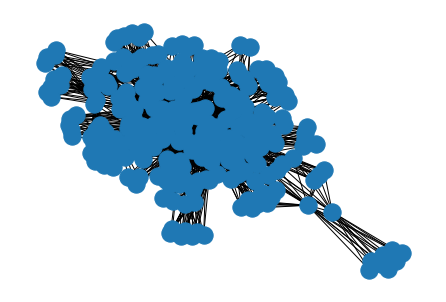

In [18]:
nx.draw(net)

In [19]:
net.number_of_nodes()

248

In [20]:
net.number_of_edges()

2141

# **4. Compute node degree and strength**


In [21]:
degreeDict = net.degree()

## strength is weighted degree
strengthDict = net.degree (weight = 'weight')

# **5. Show the top 10 nodes by degree and top 10 nodes by strength**

In [22]:
## result table format 
## colm 1 = nodes
## colm 2 = degree = k
## colm 3 = strength = w

c = ['Nodes', 'Degree']
df_degree = pd.DataFrame(degreeDict, columns = c)

## dataframe of keywords
df_words = pd.DataFrame(unique_keyword_list, columns = ['Keywords'])
df_words_degree = pd.merge(df_words, df_degree, left_index=True, right_index=True)
df_words_degree[['Keywords','Degree']].sort_values(by =['Degree'], ascending=False).head(10)


,Keywords,Degree
23,ORGANIZATIONAL behavior,166
112,ORGANIZATIONAL effectiveness,104
16,MANAGEMENT science,102
20,PERSONNEL management,93
8,DECISION making,90
156,ORGANIZATIONAL structure,74
40,ORGANIZATIONAL sociology,66
88,STRATEGIC planning,66
47,INDUSTRIAL management,64
9,CORPORATE governance,62


In [23]:
df_strength = pd.DataFrame(strengthDict, columns = ['Nodes', 'Strength'])


result_df = pd.merge(
              df_words_degree,
              df_strength,
              how="inner",
              on=['Nodes'])
result_df[['Keywords','Strength']].sort_values(by =['Strength'], ascending=False).head(10)

,Keywords,Strength
23,ORGANIZATIONAL behavior,265
112,ORGANIZATIONAL effectiveness,144
16,MANAGEMENT science,136
20,PERSONNEL management,126
8,DECISION making,112
156,ORGANIZATIONAL structure,107
40,ORGANIZATIONAL sociology,96
9,CORPORATE governance,85
47,INDUSTRIAL management,84
88,STRATEGIC planning,80


# **6. Show the top 10 node link by weight**


## Network link has propery called find the link with largest weights

https://stackoverflow.com/questions/16111368/getting-top-n-edges-in-a-graph-networkx

In [46]:
df1 = pd.DataFrame()
for i in range(0, 248):
  for j in range(0, 248):
    if net.get_edge_data(i, j):
      if i > j: ## do not differentiate if they are Aij or Aji they both are same word pairs 
        data_row = {
            'Node1': int(i),
            'Node2': int(j),
            'firstKeyword':df_words.iat[int(i),0],
            'secondKeyword':df_words.iat[int(j),0],
            'weight': net.get_edge_data(i,j)['weight']
        }
      df1=df1.append(data_row,ignore_index=True)

In [48]:
df_links = df1[['firstKeyword','secondKeyword','weight']].sort_values(by='weight', ascending=False).head(10)

df_links

,firstKeyword,secondKeyword,weight
2492,ORGANIZATIONAL effectiveness,ORGANIZATIONAL behavior,11.0
3188,ORGANIZATIONAL structure,ORGANIZATIONAL behavior,9.0
749,ORGANIZATIONAL behavior,PERSONNEL management,8.0
745,ORGANIZATIONAL behavior,MANAGEMENT science,7.0
1270,ORGANIZATIONAL sociology,ORGANIZATIONAL behavior,6.0
739,ORGANIZATIONAL behavior,DECISION making,6.0
3221,ORGANIZATIONAL structure,ORGANIZATIONAL effectiveness,6.0
740,ORGANIZATIONAL behavior,CORPORATE governance,6.0
1126,ORGANIZATIONAL change,ORGANIZATIONAL behavior,5.0
1272,ORGANIZATIONAL sociology,TEAMS in the workplace,5.0


# **7. Plot average strength on y-axis and degree on x-axis**

In [ ]:
result_df = pd.merge(
              df_degree,
              df_strength,
              how="inner",
              on=['Nodes'])

In [ ]:
table = result_df[['Degree','Strength']].groupby('Degree').mean().reset_index()

## To take avg strength group by degree
## plot avg strenght vs degree
## log scale - conversion
## https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.loglog.html

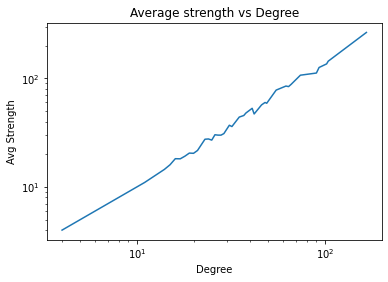

In [ ]:
x = table['Degree']
y = table['Strength']

plt.loglog(x, y)
#plt.plot(x,y)
plt.title('Average strength vs Degree')
plt.xlabel('Degree')
plt.ylabel('Avg Strength')
plt.show()